# Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Access Data

In [ ]:
file_id = '1iNTFeAEgyIVzXENvR6Hogg3sNSfIZPkX'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('data.pkl')

In [2]:
data = pd.read_pickle("data.pkl")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,tsDate
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",1441459800
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",1441366200
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,1535760060
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",1441457100
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",1441458000


# Exploratory Data Analysis

## Check for Missing Data

In [3]:
round(data.isnull().sum()*100/data.shape[0],2)

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.13
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    8.04
Community Area          8.02
FBI Code                0.00
X Coordinate            1.06
Y Coordinate            1.06
Year                    0.00
Updated On              0.00
Latitude                1.06
Longitude               1.06
Location                1.06
tsDate                  0.00
dtype: float64

We can see that there are a few variables like Location Description, X, Y Coordinate and Latitude and Longitude which have 1% or less missing values. We can remove these rows from our dataframe . On the other hand Ward and Community area have approx 8% missing values. We can replace these missing values with the word 'Missing' to preserve more information without dropping rows.

In [4]:
## Removing missing values in the dataframe for location related variables 
data = data.dropna(subset=['Location Description', 'X Coordinate','Y Coordinate','Latitude','Longitude','Location'])

## Replacing the remaining missing values with 'Missing'
data = data.fillna('Missing')

In [5]:
round(data.isnull().sum()*100/data.shape[0],2)

ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
IUCR                    0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
Location                0.0
tsDate                  0.0
dtype: float64

We can see that there are no longer any missing values in our dataset

## Checking the data type of each column in the datframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564117 entries, 0 to 7651596
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              object        
 12  Ward                  object        
 13  Community Area        object        
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

We can observe that there 4 columns which are integers, 1 date type column, 2 boolean columns, 7 numerical columns and 10 categorical columns. Let us try separating them by data type and get the column names in the form of a dictionary by data type. Additionally, we can observe that the ID column is not relevant for our problem statement and therefore we can drop that. Also, we can convert the columns Beat and Year to categorical variables or objects .

In [7]:
## Dropping ID column 
data = data.drop(['ID'], axis=1)

## Changing Data type of Year and Beat
data[['Beat','Year']] = data[['Beat','Year']].astype(str)

In [8]:
g = data.columns.to_series().groupby(data.dtypes).groups
data_col_dict = {k.name: v for k, v in g.items()}
int_col = data_col_dict['int64']
datetime_col = data_col_dict['datetime64[ns]']
bool_col = data_col_dict['bool']
num_col = data_col_dict['float64']
str_col = data_col_dict['object']

In [9]:
data_col_dict

{'datetime64[ns]': Index(['Date'], dtype='object'),
 'bool': Index(['Arrest', 'Domestic'], dtype='object'),
 'int64': Index(['tsDate'], dtype='object'),
 'float64': Index(['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'], dtype='object'),
 'object': Index(['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
        'Location Description', 'Beat', 'District', 'Ward', 'Community Area',
        'FBI Code', 'Year', 'Updated On', 'Location'],
       dtype='object')}

Now let us perform exploratory analysis on each column type and try to identify any patterns with the target variable

## Numerical Columns

In [10]:
round(data[num_col].describe(),2)

,X Coordinate,Y Coordinate,Latitude,Longitude
count,7564117.00,7564117.00,7564117.00,7564117.00
mean,1164587.91,1885756.52,41.84,-87.67
std,16853.08,32280.68,0.09,0.06
min,0.00,0.00,36.62,-91.69
25%,1152967.00,1859071.00,41.77,-87.71
50%,1166090.00,1890701.00,41.86,-87.67
75%,1176365.00,1909229.00,41.91,-87.63
max,1205119.00,1951622.00,42.02,-87.52


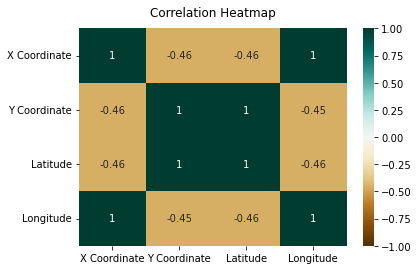

In [12]:
heatmap=sns.heatmap(data[num_col].corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As evident, we can see that the X Coordinate is perfectly correlated to the Longitude while the Y coordinate is perfectly correlated to the latitude. There is not much correlation between X and Y coordinate and Lattidue and Longitude.

Now let us try to get the distribution of the numerical columns with a box plot

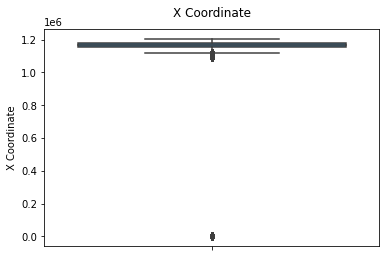

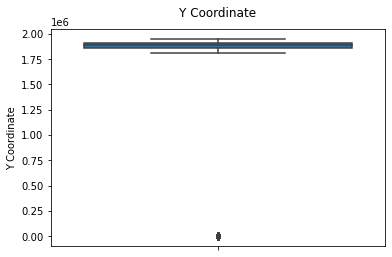

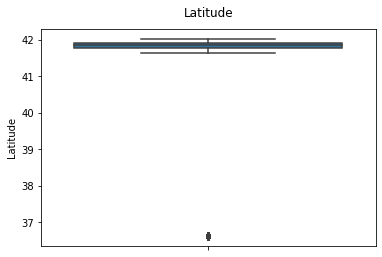

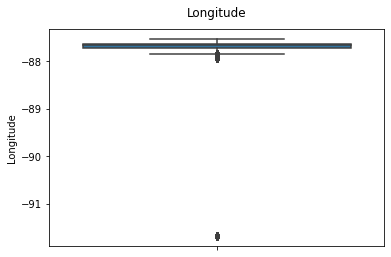

In [14]:
for col in num_col:
    box = sns.boxplot(y = data[col])
    box.set_title(col, fontdict={'fontsize':12}, pad=12)
    plt.show()

We can observe that variance in values of X and Y coordinates and the Latitude Coordinates is quiet small. Therefore these features may not add any extra information if we add them to our model. We will perform variable selection later on to confirm that and drop these variables if neccessary.

## Boolean Columns

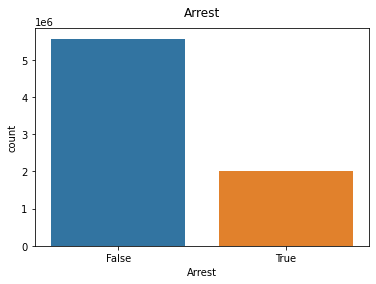

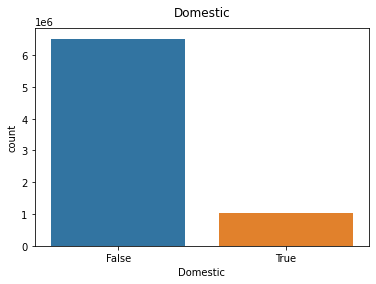

In [18]:
for col in bool_col:
    count = sns.countplot(data[col])
    count.set_title(col, fontdict={'fontsize':12}, pad=12)
    plt.show()

We can observe the following things:
 - In most crimes , arrests are not made.
 - Majority of the crimes are not related to domestic violence (as defined by the Illinois Domestic Violence Act)

We can also check how the above boolean variables relate to various types of crimes which is our target label.

In [19]:
def stacked_bar(df_inp,y_col,col_list,fig_height=10,fig_width=5,is_perc=False): 
    for col in col_list:
        df_test=df_inp.groupby(y_col)[col].value_counts(is_perc).unstack(col).fillna(0)
        s = df_test.sum(axis=1).sort_values(ascending=True)
        df_test=df_test.loc[s.index]
        count=df_test.plot.barh(stacked=True,figsize=(fig_width, fig_height))
        count.set_title(col, fontdict={'fontsize':12}, pad=12)

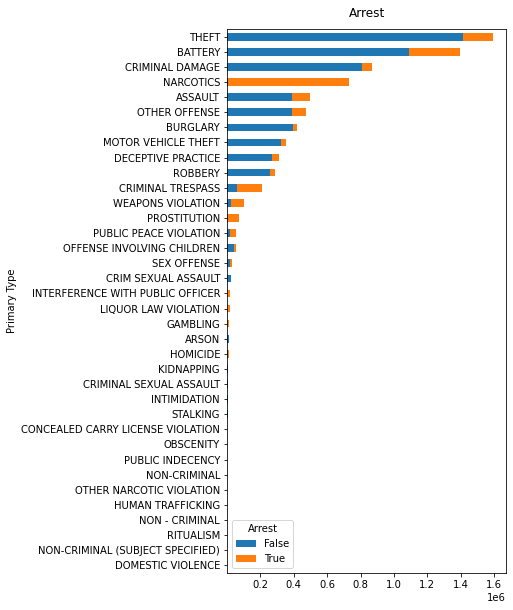

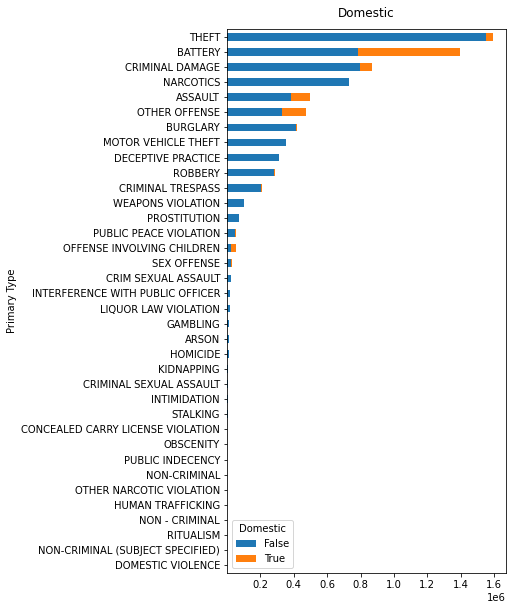

In [20]:
stacked_bar(data,'Primary Type',bool_col,is_perc=False)

We can make the following inferences from the data :
- For the arrests made , Theft, Battery and Criminal Damage have the least number of arrests made as compared to the total crimes committed. On the other hand, Narcotics, Weapons Violation and prostitution have the highest proportion of arrests made.
- For domestic violence, most crimes are of the type Battery, Criminal Damage and Assault

## Categorical Columns

In [21]:
col_list= [  'Primary Type', 'District', 'Ward', 'Community Area',
       'FBI Code', 'Year']

def normal_bar(df_inp,col_list,fig_height=10,fig_width=5,is_perc=False):
    for col in col_list:
        df_test=pd.DataFrame(data[col].value_counts(normalize=is_perc).sort_values(ascending=True))
        count=df_test.plot.barh(stacked=False,figsize=(fig_width, fig_height))
        count.set_title(col, fontdict={'fontsize':12}, pad=12)

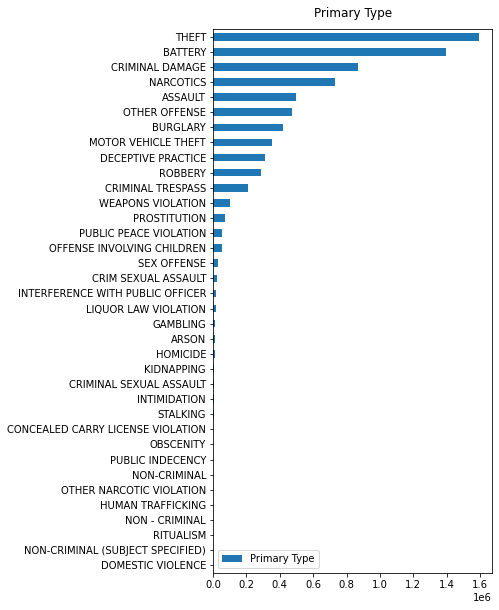

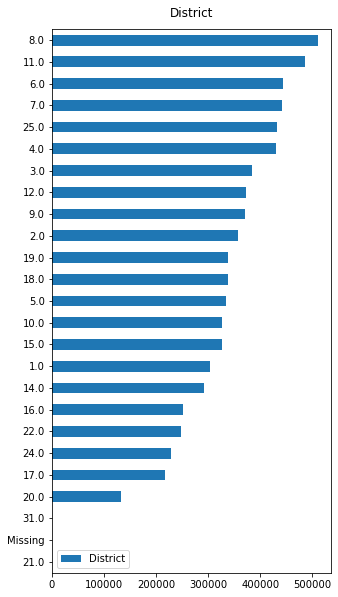

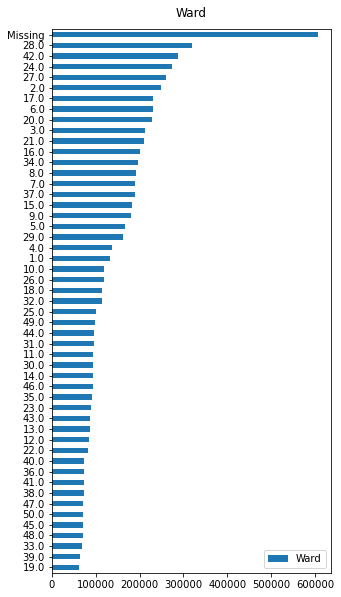

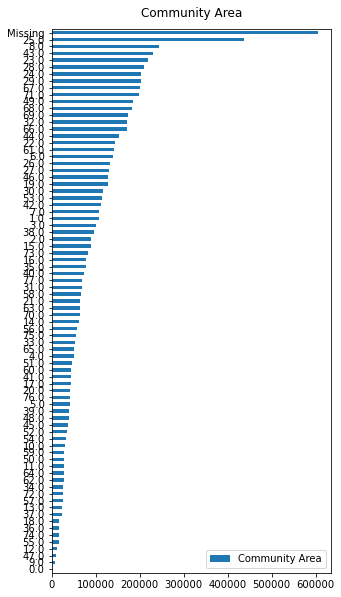

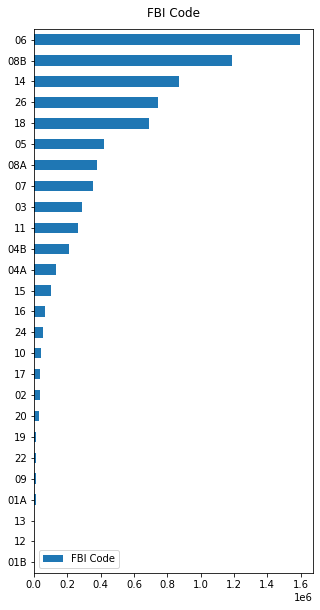

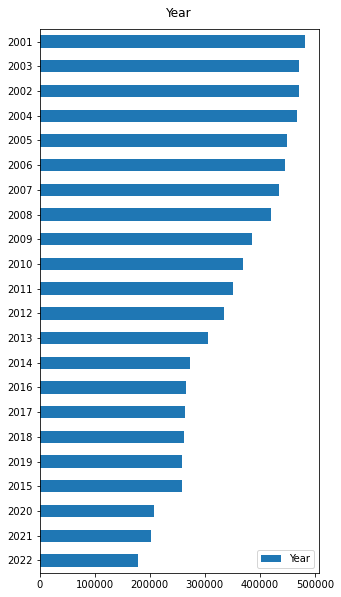

In [22]:
normal_bar(data,col_list)

We can infer the following things
- Theft,Battery,Narcotics and Assault are the most common crimes.
- Only a few type of criminal activities make up for the majority of crimes occuring. Since its our target variable, our dataset is unbalalanced and we might need to sample equally from each crime type to get desirable results in our model.
- Most values in Community Area and Ward are missing.
- Number of crimes have reduced as the years have progressed.